# KNN - UNSW

In [1]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV


In [3]:
def load_train_dataset():
    df_train = pd.read_csv('USNW_train-set.csv')
    
    limit1 = df_train.shape[1]-1
    
    X_train = df_train.iloc[:,0:limit1]
    Y_train = df_train.iloc[:,limit1]
    
    return  X_train, Y_train,  df_train

X_train, Y_train,  df_train = load_train_dataset()

In [4]:
def load_test_dataset():
    df_test = pd.read_csv('USNW_test-set.csv')

    limit2 = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit2]
    Y_test = df_test.iloc[:,limit2]
    
    return X_test, Y_test,df_test

X_test, Y_test ,df_test = load_test_dataset()

In [5]:
X_train, X_val , Y_train , Y_val = train_test_split(X_train,Y_train, test_size=0.2,stratify = Y_train,
                                                    shuffle=True,random_state=42)

print('Training X   :',X_train.shape)
print('Validation X :',X_val.shape)
print('Test_X       :',X_test.shape)
print('Training_Y   :',Y_train.shape)
print('Validation Y :',Y_val.shape)
print('Test_Y       :',Y_test.shape)

Training X   : (78649, 65)
Validation X : (19663, 65)
Test_X       : (53899, 65)
Training_Y   : (78649,)
Validation Y : (19663,)
Test_Y       : (53899,)


Performed one hot encoding on training set and test set separetely to avoid data leakage. 

In [6]:
knn_classifier = KNeighborsClassifier(n_neighbors = 9, p = 1,weights='distance').fit(X_train,Y_train)

In [7]:
test_predictions = knn_classifier.predict(X_test)

print("Cross-Validation set accuracy: {:.6f} %".format((cross_val_score(knn_classifier, X_val, Y_val, 
                                                                        cv=2,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.6f} %".format(knn_classifier.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.6f} %".format(accuracy_score(Y_test, test_predictions)*100))

Cross-Validation set accuracy: 90.250713 %
Train set accuracy           : 99.821994 %
Test set accuracy            : 79.007032 %


In [8]:
print("Test set precision : {:.4f}".format(precision_score(Y_test, test_predictions)))
print("Test set recall    : {:.4f}".format(recall_score(Y_test, test_predictions)))
print("Test set F1-score  : {:.4f}".format(f1_score(Y_test, test_predictions)))

Test set precision : 0.6453
Test set recall    : 0.9446
Test set F1-score  : 0.7668


In [9]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p, normalize= 'true')
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".2f")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives  : {:.2f}'.format(cm[0][0]))
    print('False Positives : {:.2f}'.format(cm[0][1]))
    print('False Negatives : {:.2f}'.format(cm[1][0]))
    print('True Positives  : {:.2f}'.format(cm[1][1]))

True Negatives  : 0.70
False Positives : 0.30
False Negatives : 0.06
True Positives  : 0.94


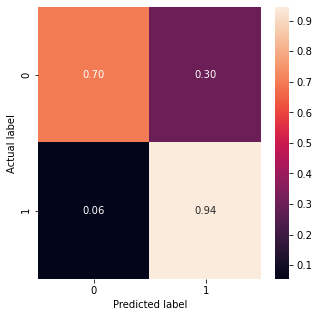

In [12]:
plot_cm(Y_test, test_predictions)

In [13]:
print(classification_report(Y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     34204
           1       0.65      0.94      0.77     19695

    accuracy                           0.79     53899
   macro avg       0.80      0.82      0.79     53899
weighted avg       0.84      0.79      0.79     53899



c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


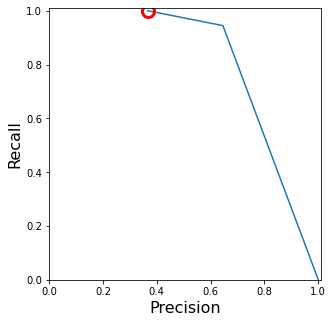

In [11]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Y_test, test_predictions)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize=(10,5))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [15]:
from sklearn.metrics import roc_curve, auc

c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


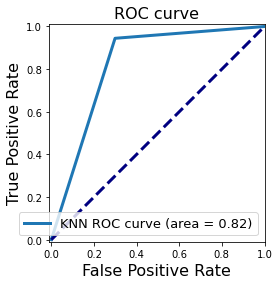

In [16]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, test_predictions)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='KNN ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [14]:
n_neighbors = list(range(1,100,1))
p=[1,2]


param_grid = [
    {'n_neighbors' : n_neighbors,
     'p':p,
     'weights':['uniform','distance']
    },]

optimal_params = GridSearchCV(
    estimator = knn_classifier,
    param_grid = param_grid,
    cv=2,
    scoring ='accuracy',
    verbose = 2)

optimal_params.fit(X_val,Y_val)
print(optimal_params.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 396 candidates, totalling 792 fits
[CV] n_neighbors=1, p=1, weights=uniform .............................
[CV] .............. n_neighbors=1, p=1, weights=uniform, total=   9.9s
[CV] n_neighbors=1, p=1, weights=uniform .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s


[CV] .............. n_neighbors=1, p=1, weights=uniform, total=   9.2s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV] ............. n_neighbors=1, p=1, weights=distance, total=   8.7s
[CV] n_neighbors=1, p=1, weights=distance ............................
[CV] ............. n_neighbors=1, p=1, weights=distance, total=   7.6s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] .............. n_neighbors=1, p=2, weights=uniform, total=  10.9s
[CV] n_neighbors=1, p=2, weights=uniform .............................
[CV] .............. n_neighbors=1, p=2, weights=uniform, total=  10.2s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV] ............. n_neighbors=1, p=2, weights=distance, total=   9.4s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV] ............. n_neighbors=1, p=2, weights=distance, total=   9.0s
[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] .

[CV] ............. n_neighbors=8, p=1, weights=distance, total=   7.8s
[CV] n_neighbors=8, p=2, weights=uniform .............................
[CV] .............. n_neighbors=8, p=2, weights=uniform, total=  11.2s
[CV] n_neighbors=8, p=2, weights=uniform .............................
[CV] .............. n_neighbors=8, p=2, weights=uniform, total=  11.0s
[CV] n_neighbors=8, p=2, weights=distance ............................
[CV] ............. n_neighbors=8, p=2, weights=distance, total=   9.8s
[CV] n_neighbors=8, p=2, weights=distance ............................
[CV] ............. n_neighbors=8, p=2, weights=distance, total=  10.4s
[CV] n_neighbors=9, p=1, weights=uniform .............................
[CV] .............. n_neighbors=9, p=1, weights=uniform, total=   9.9s
[CV] n_neighbors=9, p=1, weights=uniform .............................
[CV] .............. n_neighbors=9, p=1, weights=uniform, total=   8.1s
[CV] n_neighbors=9, p=1, weights=distance ............................
[CV] .

[CV] ............. n_neighbors=15, p=2, weights=uniform, total=  10.4s
[CV] n_neighbors=15, p=2, weights=distance ...........................
[CV] ............ n_neighbors=15, p=2, weights=distance, total=  10.4s
[CV] n_neighbors=15, p=2, weights=distance ...........................
[CV] ............ n_neighbors=15, p=2, weights=distance, total=  10.3s
[CV] n_neighbors=16, p=1, weights=uniform ............................
[CV] ............. n_neighbors=16, p=1, weights=uniform, total=   9.9s
[CV] n_neighbors=16, p=1, weights=uniform ............................
[CV] ............. n_neighbors=16, p=1, weights=uniform, total=   8.6s
[CV] n_neighbors=16, p=1, weights=distance ...........................
[CV] ............ n_neighbors=16, p=1, weights=distance, total=  10.3s
[CV] n_neighbors=16, p=1, weights=distance ...........................
[CV] ............ n_neighbors=16, p=1, weights=distance, total=   8.7s
[CV] n_neighbors=16, p=2, weights=uniform ............................
[CV] .

[CV] ............ n_neighbors=22, p=2, weights=distance, total=  10.4s
[CV] n_neighbors=23, p=1, weights=uniform ............................
[CV] ............. n_neighbors=23, p=1, weights=uniform, total=   9.9s
[CV] n_neighbors=23, p=1, weights=uniform ............................
[CV] ............. n_neighbors=23, p=1, weights=uniform, total=   9.0s
[CV] n_neighbors=23, p=1, weights=distance ...........................
[CV] ............ n_neighbors=23, p=1, weights=distance, total=   9.7s
[CV] n_neighbors=23, p=1, weights=distance ...........................
[CV] ............ n_neighbors=23, p=1, weights=distance, total=   8.6s
[CV] n_neighbors=23, p=2, weights=uniform ............................
[CV] ............. n_neighbors=23, p=2, weights=uniform, total=  11.1s
[CV] n_neighbors=23, p=2, weights=uniform ............................
[CV] ............. n_neighbors=23, p=2, weights=uniform, total=  10.5s
[CV] n_neighbors=23, p=2, weights=distance ...........................
[CV] .

[CV] ............. n_neighbors=30, p=1, weights=uniform, total=   9.5s
[CV] n_neighbors=30, p=1, weights=distance ...........................
[CV] ............ n_neighbors=30, p=1, weights=distance, total=   9.5s
[CV] n_neighbors=30, p=1, weights=distance ...........................
[CV] ............ n_neighbors=30, p=1, weights=distance, total=   8.8s
[CV] n_neighbors=30, p=2, weights=uniform ............................
[CV] ............. n_neighbors=30, p=2, weights=uniform, total=  11.6s
[CV] n_neighbors=30, p=2, weights=uniform ............................
[CV] ............. n_neighbors=30, p=2, weights=uniform, total=  10.1s
[CV] n_neighbors=30, p=2, weights=distance ...........................
[CV] ............ n_neighbors=30, p=2, weights=distance, total=  11.2s
[CV] n_neighbors=30, p=2, weights=distance ...........................
[CV] ............ n_neighbors=30, p=2, weights=distance, total=   9.4s
[CV] n_neighbors=31, p=1, weights=uniform ............................
[CV] .

[CV] ............ n_neighbors=37, p=1, weights=distance, total=   9.7s
[CV] n_neighbors=37, p=2, weights=uniform ............................
[CV] ............. n_neighbors=37, p=2, weights=uniform, total=  10.9s
[CV] n_neighbors=37, p=2, weights=uniform ............................
[CV] ............. n_neighbors=37, p=2, weights=uniform, total=  11.7s
[CV] n_neighbors=37, p=2, weights=distance ...........................
[CV] ............ n_neighbors=37, p=2, weights=distance, total=  11.1s
[CV] n_neighbors=37, p=2, weights=distance ...........................
[CV] ............ n_neighbors=37, p=2, weights=distance, total=   9.9s
[CV] n_neighbors=38, p=1, weights=uniform ............................
[CV] ............. n_neighbors=38, p=1, weights=uniform, total=  10.4s
[CV] n_neighbors=38, p=1, weights=uniform ............................
[CV] ............. n_neighbors=38, p=1, weights=uniform, total=   8.7s
[CV] n_neighbors=38, p=1, weights=distance ...........................
[CV] .

[CV] ............. n_neighbors=44, p=2, weights=uniform, total=  11.3s
[CV] n_neighbors=44, p=2, weights=distance ...........................
[CV] ............ n_neighbors=44, p=2, weights=distance, total=  11.5s
[CV] n_neighbors=44, p=2, weights=distance ...........................
[CV] ............ n_neighbors=44, p=2, weights=distance, total=  10.0s
[CV] n_neighbors=45, p=1, weights=uniform ............................
[CV] ............. n_neighbors=45, p=1, weights=uniform, total=  10.3s
[CV] n_neighbors=45, p=1, weights=uniform ............................
[CV] ............. n_neighbors=45, p=1, weights=uniform, total=   8.3s
[CV] n_neighbors=45, p=1, weights=distance ...........................
[CV] ............ n_neighbors=45, p=1, weights=distance, total=  10.7s
[CV] n_neighbors=45, p=1, weights=distance ...........................
[CV] ............ n_neighbors=45, p=1, weights=distance, total=   9.0s
[CV] n_neighbors=45, p=2, weights=uniform ............................
[CV] .

[CV] ............ n_neighbors=51, p=2, weights=distance, total=  10.9s
[CV] n_neighbors=52, p=1, weights=uniform ............................
[CV] ............. n_neighbors=52, p=1, weights=uniform, total=  10.6s
[CV] n_neighbors=52, p=1, weights=uniform ............................
[CV] ............. n_neighbors=52, p=1, weights=uniform, total=   9.5s
[CV] n_neighbors=52, p=1, weights=distance ...........................
[CV] ............ n_neighbors=52, p=1, weights=distance, total=   9.5s
[CV] n_neighbors=52, p=1, weights=distance ...........................
[CV] ............ n_neighbors=52, p=1, weights=distance, total=   9.5s
[CV] n_neighbors=52, p=2, weights=uniform ............................
[CV] ............. n_neighbors=52, p=2, weights=uniform, total=  12.0s
[CV] n_neighbors=52, p=2, weights=uniform ............................
[CV] ............. n_neighbors=52, p=2, weights=uniform, total=  11.0s
[CV] n_neighbors=52, p=2, weights=distance ...........................
[CV] .

[CV] ............. n_neighbors=59, p=1, weights=uniform, total=   8.5s
[CV] n_neighbors=59, p=1, weights=distance ...........................
[CV] ............ n_neighbors=59, p=1, weights=distance, total=  10.0s
[CV] n_neighbors=59, p=1, weights=distance ...........................
[CV] ............ n_neighbors=59, p=1, weights=distance, total=   9.7s
[CV] n_neighbors=59, p=2, weights=uniform ............................
[CV] ............. n_neighbors=59, p=2, weights=uniform, total=  11.6s
[CV] n_neighbors=59, p=2, weights=uniform ............................
[CV] ............. n_neighbors=59, p=2, weights=uniform, total=  10.4s
[CV] n_neighbors=59, p=2, weights=distance ...........................
[CV] ............ n_neighbors=59, p=2, weights=distance, total=  10.9s
[CV] n_neighbors=59, p=2, weights=distance ...........................
[CV] ............ n_neighbors=59, p=2, weights=distance, total=  11.2s
[CV] n_neighbors=60, p=1, weights=uniform ............................
[CV] .

[CV] ............ n_neighbors=66, p=1, weights=distance, total=   9.2s
[CV] n_neighbors=66, p=2, weights=uniform ............................
[CV] ............. n_neighbors=66, p=2, weights=uniform, total=  11.6s
[CV] n_neighbors=66, p=2, weights=uniform ............................
[CV] ............. n_neighbors=66, p=2, weights=uniform, total=  10.6s
[CV] n_neighbors=66, p=2, weights=distance ...........................
[CV] ............ n_neighbors=66, p=2, weights=distance, total=  11.1s
[CV] n_neighbors=66, p=2, weights=distance ...........................
[CV] ............ n_neighbors=66, p=2, weights=distance, total=  11.4s
[CV] n_neighbors=67, p=1, weights=uniform ............................
[CV] ............. n_neighbors=67, p=1, weights=uniform, total=  10.1s
[CV] n_neighbors=67, p=1, weights=uniform ............................
[CV] ............. n_neighbors=67, p=1, weights=uniform, total=   9.7s
[CV] n_neighbors=67, p=1, weights=distance ...........................
[CV] .

[CV] ............. n_neighbors=73, p=2, weights=uniform, total=  10.8s
[CV] n_neighbors=73, p=2, weights=distance ...........................
[CV] ............ n_neighbors=73, p=2, weights=distance, total=  11.9s
[CV] n_neighbors=73, p=2, weights=distance ...........................
[CV] ............ n_neighbors=73, p=2, weights=distance, total=  10.0s
[CV] n_neighbors=74, p=1, weights=uniform ............................
[CV] ............. n_neighbors=74, p=1, weights=uniform, total=  10.6s
[CV] n_neighbors=74, p=1, weights=uniform ............................
[CV] ............. n_neighbors=74, p=1, weights=uniform, total=   9.8s
[CV] n_neighbors=74, p=1, weights=distance ...........................
[CV] ............ n_neighbors=74, p=1, weights=distance, total=  10.3s
[CV] n_neighbors=74, p=1, weights=distance ...........................
[CV] ............ n_neighbors=74, p=1, weights=distance, total=   9.2s
[CV] n_neighbors=74, p=2, weights=uniform ............................
[CV] .

[CV] ............ n_neighbors=80, p=2, weights=distance, total=  10.4s
[CV] n_neighbors=81, p=1, weights=uniform ............................
[CV] ............. n_neighbors=81, p=1, weights=uniform, total=  10.7s
[CV] n_neighbors=81, p=1, weights=uniform ............................
[CV] ............. n_neighbors=81, p=1, weights=uniform, total=   9.4s
[CV] n_neighbors=81, p=1, weights=distance ...........................
[CV] ............ n_neighbors=81, p=1, weights=distance, total=  10.9s
[CV] n_neighbors=81, p=1, weights=distance ...........................
[CV] ............ n_neighbors=81, p=1, weights=distance, total=   9.5s
[CV] n_neighbors=81, p=2, weights=uniform ............................
[CV] ............. n_neighbors=81, p=2, weights=uniform, total=  11.6s
[CV] n_neighbors=81, p=2, weights=uniform ............................
[CV] ............. n_neighbors=81, p=2, weights=uniform, total=  11.0s
[CV] n_neighbors=81, p=2, weights=distance ...........................
[CV] .

[CV] ............. n_neighbors=88, p=1, weights=uniform, total=   9.8s
[CV] n_neighbors=88, p=1, weights=distance ...........................
[CV] ............ n_neighbors=88, p=1, weights=distance, total=  10.1s
[CV] n_neighbors=88, p=1, weights=distance ...........................
[CV] ............ n_neighbors=88, p=1, weights=distance, total=   9.6s
[CV] n_neighbors=88, p=2, weights=uniform ............................
[CV] ............. n_neighbors=88, p=2, weights=uniform, total=  12.3s
[CV] n_neighbors=88, p=2, weights=uniform ............................
[CV] ............. n_neighbors=88, p=2, weights=uniform, total=  10.9s
[CV] n_neighbors=88, p=2, weights=distance ...........................
[CV] ............ n_neighbors=88, p=2, weights=distance, total=  11.9s
[CV] n_neighbors=88, p=2, weights=distance ...........................
[CV] ............ n_neighbors=88, p=2, weights=distance, total=  10.4s
[CV] n_neighbors=89, p=1, weights=uniform ............................
[CV] .

[CV] ............ n_neighbors=95, p=1, weights=distance, total=   9.3s
[CV] n_neighbors=95, p=2, weights=uniform ............................
[CV] ............. n_neighbors=95, p=2, weights=uniform, total=  12.1s
[CV] n_neighbors=95, p=2, weights=uniform ............................
[CV] ............. n_neighbors=95, p=2, weights=uniform, total=  10.6s
[CV] n_neighbors=95, p=2, weights=distance ...........................
[CV] ............ n_neighbors=95, p=2, weights=distance, total=  12.5s
[CV] n_neighbors=95, p=2, weights=distance ...........................
[CV] ............ n_neighbors=95, p=2, weights=distance, total=  10.9s
[CV] n_neighbors=96, p=1, weights=uniform ............................
[CV] ............. n_neighbors=96, p=1, weights=uniform, total=  11.3s
[CV] n_neighbors=96, p=1, weights=uniform ............................
[CV] ............. n_neighbors=96, p=1, weights=uniform, total=   9.3s
[CV] n_neighbors=96, p=1, weights=distance ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 792 out of 792 | elapsed: 138.4min finished


{'n_neighbors': 18, 'p': 1, 'weights': 'distance'}
